## Hotel Booking Analysis
<p>The aim is to create meaningful estimators from the data set we have and to select the model that predicts the cancellation best by comparing them with the accuracy scores of different ML models and ROC Curves.</p>

#### 1- EDA
<strong>Content of exploratory data analysis.</strong>

<p>Repeated guest effect on cancellations.<br>
Night spent at hotels.<br>
Hotel type with more time spent.<br>
Effects of deposit on cancellations by segments.<br>
Relationship of lead time with cancellation.<br>
Monthly customers and cancellations.<p>

#### 2- Preprocessing
<p>This part is not much organized because I decided what to do some features with missing values after Correlation and The fact about 'reservation_status' part.</P>

Handling missing values
Handling features
Correlation
The fact about 'reservation status' (decision tree model)
Last arrangements before model comparisons.

#### 3- Models and ROC Curve Comparison
- Not all models have tuning part, the best two models tuned.

- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Classification
- Decision Tree Model
- Random Forest
- Model Tuning for Random Forest
- XGBoost
- Neural Network
- Model Tuning for Neural Network

In [1]:
# import libararies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score, auc, roc_curve

In [2]:
#load dataset
df = pd.read_csv('hotel_bookings.csv')
# show 5 row head
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [80]:
df.shape

(119390, 32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
SDN        1
GUY        1
DMA        1
SLE        1
Name: country, Length: 177, dtype: int64

### EDA - Explora Data Analysis

In [7]:
data = df.copy()

In [8]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

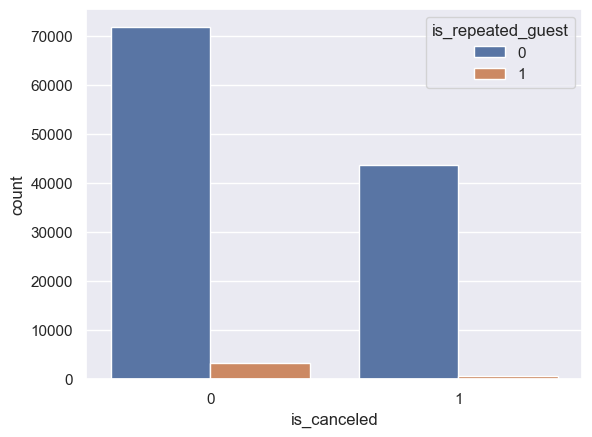

In [11]:
sns.set(style='darkgrid')
sns.countplot(x='is_canceled', data=data, hue = 'is_repeated_guest')

<p>Biểu đồ cho thấy lượng khách cũ quay lại du lịch là rất thấp, chỉ khoảng 3000 người quay lại nơi mình đã đi du lịch.
và tỉ lệ hủy phòng của khách mới cao hơn hẳn khách cũ khoảng 40% hủy phòng, trong khi khách quay lại chỉ khoảng 10%</p>

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

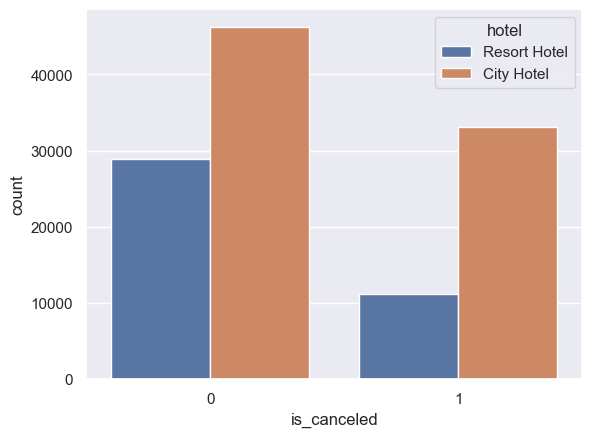

In [12]:
sns.countplot(x='is_canceled', data=data, hue = 'hotel')

<p>Biểu đồ cho thấy khách sẽ chọn kì nghỉ ở City Hotel nhiều hơn so với Resort. Nhưng tỉ lệ hủy phòng của khách resort thấp hơn so với khách ở City Hotel. <br>Số khách đặt hotel và hủy là <b>41.72</b> %<br>
Số khách đặt resort và hủy là <b>27.76</b> %</p>

In [13]:
#lấy ra các trường hợp nghỉ ở resort và hotel
hotel = df[df['hotel']=='City Hotel']
resort = df[df['hotel']=='Resort Hotel']


In [14]:
#tính phần trăm người đặt hotel hủy và resort hủy
hotel_canceled = hotel[hotel['is_canceled']==1]
resort_canceled = resort[resort['is_canceled']==1]


In [15]:

hotel_percent_cancel = (hotel_canceled.shape[0]/hotel.shape[0])*100
resort_percent_cancel = (resort_canceled.shape[0]/resort.shape[0])*100

# print
print(f'Số khách đặt hotel và hủy là {hotel_percent_cancel} %')
print(f'Số khách đặt resort và hủy là {resort_percent_cancel} %')

Số khách đặt hotel và hủy là 41.72696331778646 %
Số khách đặt resort và hủy là 27.763354967548675 %


<AxesSubplot: xlabel='market_segment', ylabel='stays_in_week_nights'>

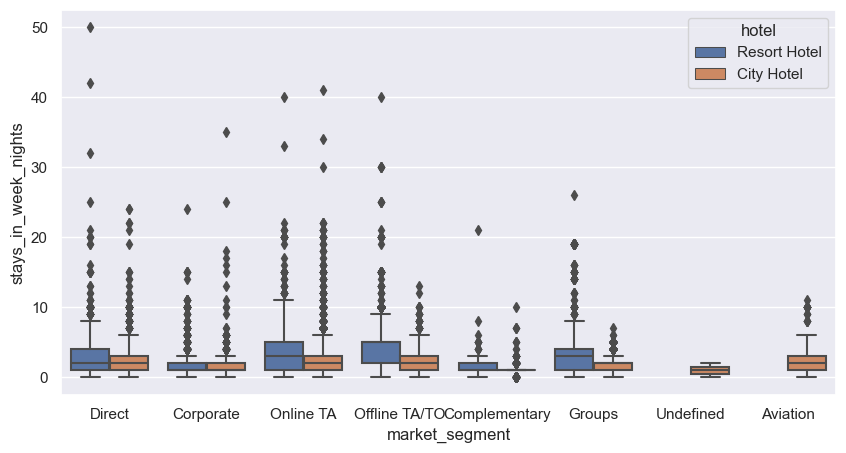

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='market_segment',y='stays_in_week_nights', data=data, hue='hotel')

<AxesSubplot: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

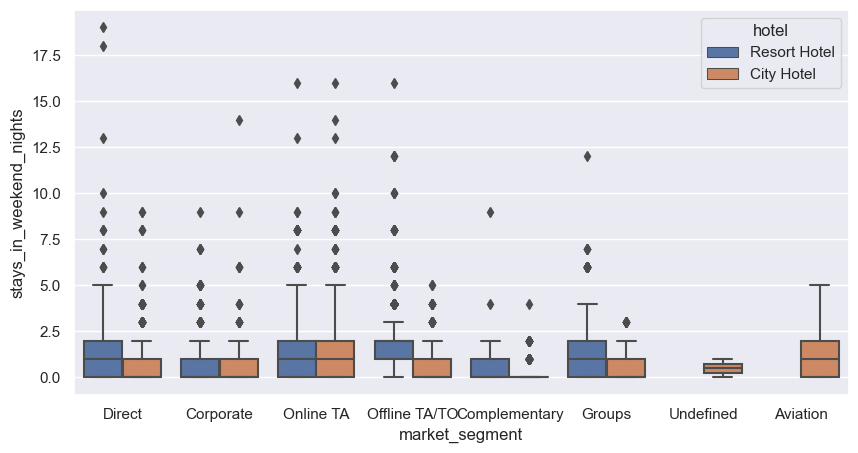

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data=data, hue='hotel')

Các phân phối trên tương đối chuẩn. Khách hàng chủ yếu có xu hướng ở lại không quá 2 tuần (13-14 ngày nếu cộng cả ngày cuối tuần và ngày trong tuần). Các khách hàng ở <b>Resort có xu hướng ở lại lâu hơn</b> so với ở City Hotel. Tôi cho rằng nguyên nhân nằm ở các khu resort thường xa trung tâm và các sân bay hơn nên việc lựa chọn du lịch ở Resort sẽ được cân nhắc để có thời gian lưu trú lại lâu hơn, Còn các khách sạn thường nằm ở gần các Sân bay và Trung tâm nên việc di chuyển và các chuyến đi ngắn ngày sẽ là lựa chọn phù hợp hơn

<AxesSubplot: xlabel='required_car_parking_spaces', ylabel='count'>

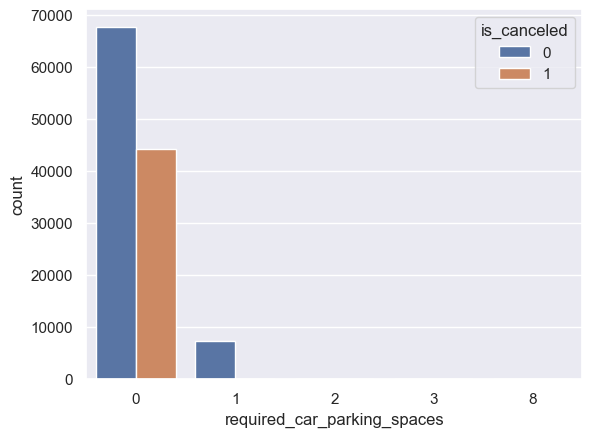

In [18]:
sns.countplot(x='required_car_parking_spaces', data=data, hue='is_canceled')

Chủ yếu khách hàng du lịch thường là người không yêu cầu khu vực để xe, lượng khách hàng để yêu cầu khu vực để xe rất ít cho thấy dân cư khu vực xung quanh khu khách sạn và resort du lịch tại đấy là rất khiêm tốn, Các khu du lịch thường đón dân cư ở nơi khác đến là chủ yếu. Và tỉ lệ hủy phòng cho thấy những người yêu cầu có khu vực để xe là cực kì thấp

<AxesSubplot: xlabel='market_segment', ylabel='count'>

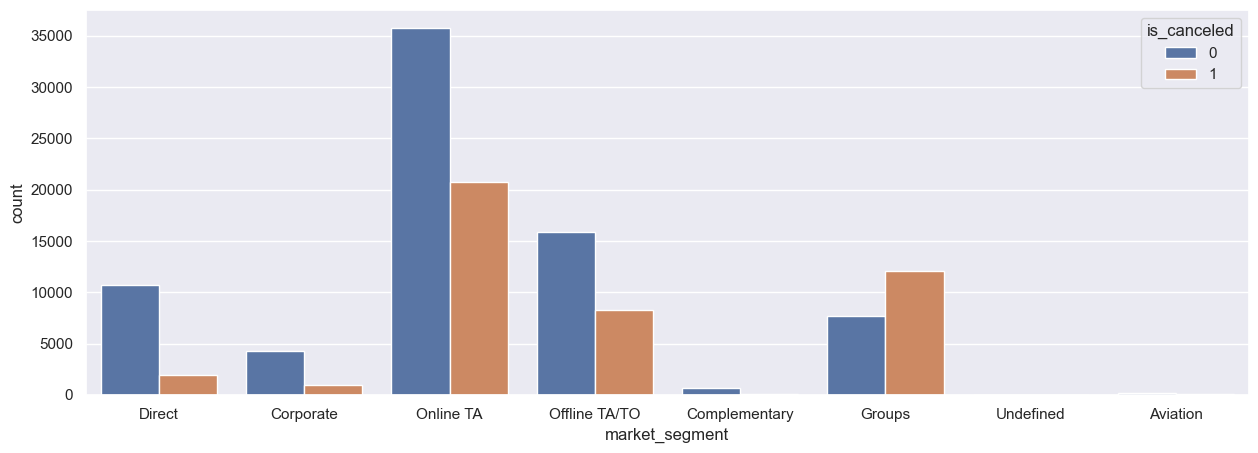

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x='market_segment', data=data, hue='is_canceled')

Biểu đồ cho thấy:
- Kênh online vẫn là kênh năng động nhất, đem lại nhiều khách hàng nhất cho các resort và hotel. Nó thể hiện tính năng động, linh hoạt của đặt phòng online
- Tỉ lệ hủy phòng của kênh booking trực tiếp là rất thấp, cho thấy độ tin cậy của phương thức đặt phòng này
- Tỉ lệ hủy phòng của các nhóm cao, hơn 60% bị hủy bởi phương thức đặt phòng bởi các nhóm

c:\Users\lecon\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\lecon\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


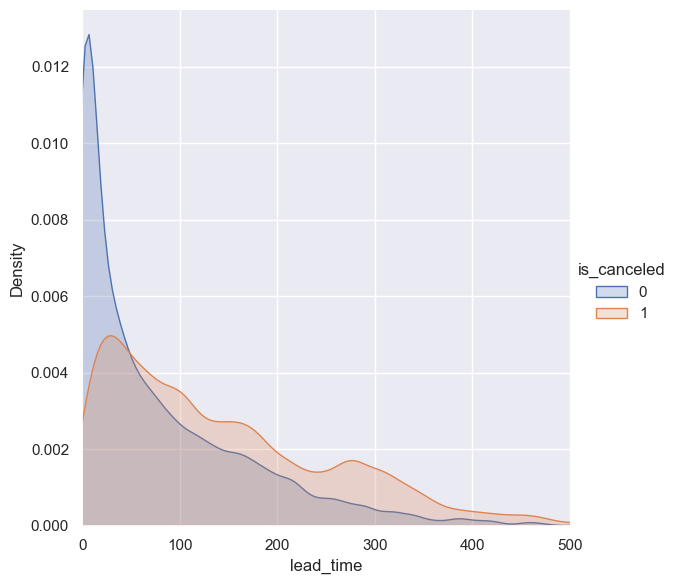

In [20]:
(sns.FacetGrid(data, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
             .map(sns.kdeplot, 'lead_time', shade = True)
             .add_legend());
plt.show()

Biểu đồ cho thấy:
- Khách hàng thường chắc chắn du lịch hơn trong khoảng trước 60 ngày trước ngày khởi hành, và sau đó tỉ lệ hủy phòng tăng lên tương đối cao, Cao hơn 60%
- 

In [21]:
# số lượng booking vé nhưng không có người đến khi đến ngày
family = data[data['adults']+data['children']+data['babies']!=0]
non_family = len(family)-data.shape[0]

<AxesSubplot: xlabel='arrival_date_month', ylabel='count'>

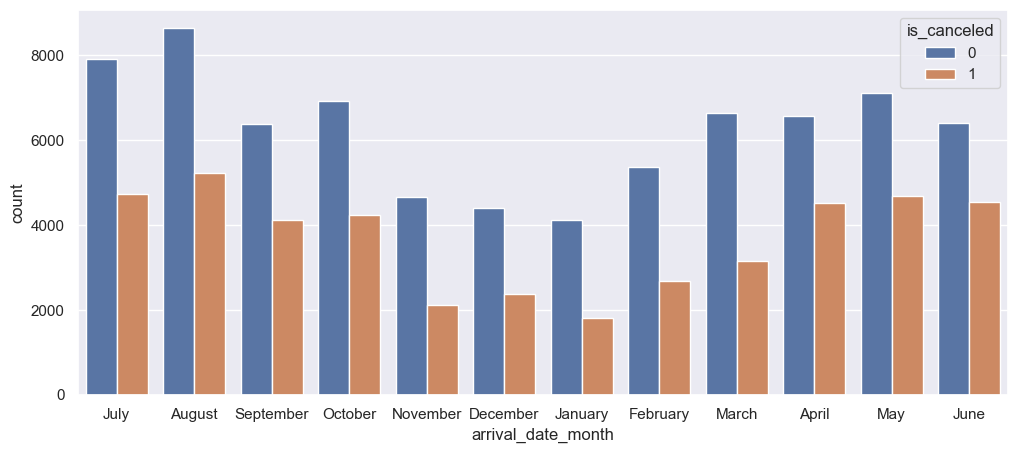

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', data=data, hue='is_canceled')

<p>Nhìn vào dồ thị cho thấy khách hàng thường sẽ chọn đi du lịch vào kì nghỉ hè hơn kì nghỉ đông. vào khoàng tháng 7, 8 lượng khách du lịch đặt phòng sẽ lớn nhất. Và biểu đồ cũng chỉ ra rằng tỉ lệ bị hủy phòng vào mùa hè cao hơn mùa đông</p>

<AxesSubplot: xlabel='arrival_date_month', ylabel='count'>

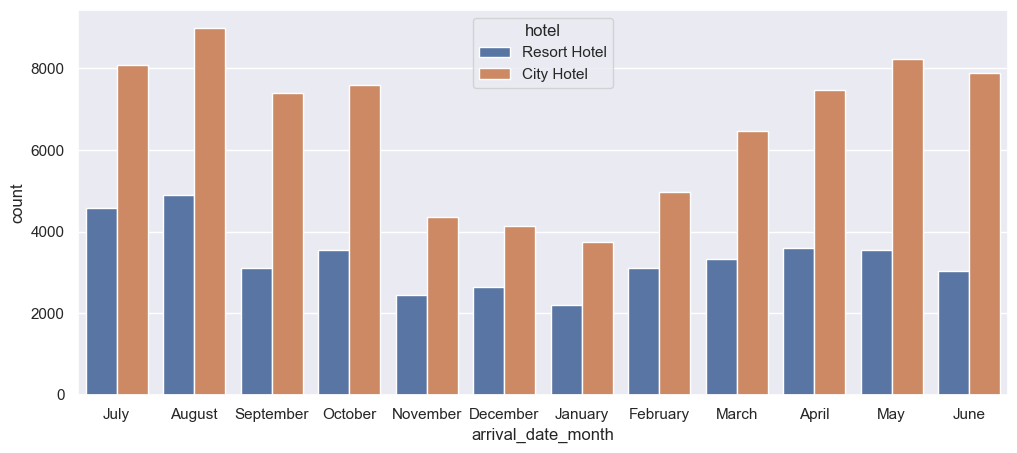

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='arrival_date_month', data=data, hue='hotel')

In [24]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot: xlabel='deposit_type', ylabel='count'>

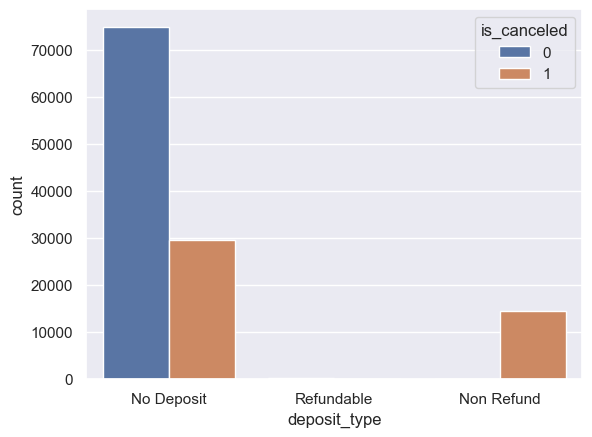

In [25]:
sns.countplot(x='deposit_type',data=data, hue='is_canceled')

<AxesSubplot: xlabel='customer_type', ylabel='count'>

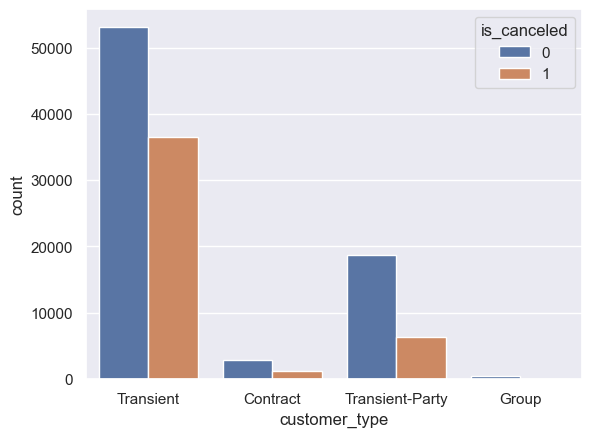

In [26]:
sns.countplot(x='customer_type', data=data, hue='is_canceled')

<AxesSubplot: xlabel='customer_type', ylabel='count'>

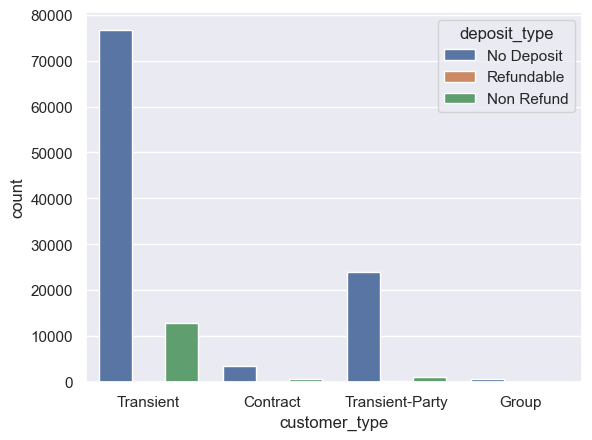

In [27]:
sns.countplot(x='customer_type', data=data, hue='deposit_type')

Biểu đồ cho thấy:
- Lượng khách không đặt cọc hủy phòng là cao nhất
- Nhưng hình thức đặt cọc và hủy phòng chiếm tỉ cao nhất, gần như 100%
- Lượng khách đặt phòng tạm thời là nhiều nhất, nhưng cũng hủy phòng nhiều nhất và chủ yếu là không đặt cọc
- 


<AxesSubplot: xlabel='reserved_room_type', ylabel='count'>

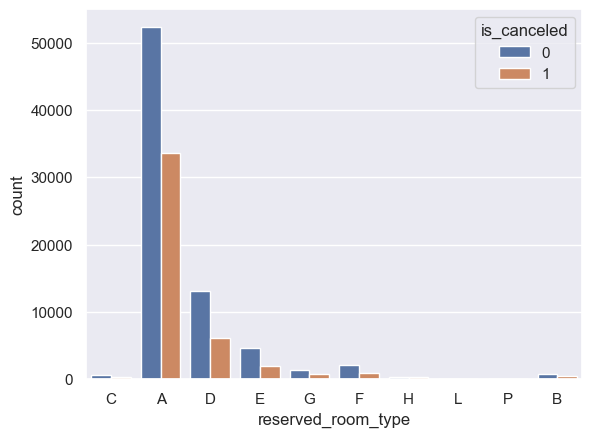

In [28]:
sns.countplot(x='reserved_room_type', data=data, hue='is_canceled')

### Preprocessing
<b>(Handing Missing Values, Features Scaling, Features Engineering)</b>

##### Handing Missing Values

In [29]:
for i in data.columns:
    if data[i].isnull().sum() != 0:
        percent=(data[i].isnull().sum()/len(data[i]))*100
        print(i ,':' , data[i].isnull().sum() ,':' ,np.round(percent,2), '%')

children : 4 : 0.0 %
country : 488 : 0.41 %
agent : 16340 : 13.69 %
company : 112593 : 94.31 %


- Ta có thể thấy lượng missing values của Company là 112593 hàng tương đương 94.31%, chúng ta không đủ dữ liệu để fill Company, Lựa chọn là Drop column
- Đối với Agent mssing values là 16340 hàng tương đương 13.96%, chúng ta sẽ fillna dựa lên mode, mean hay median
- Đối với cột Country, missing values là 488, tương đương 0.41%, sẽ xử lý bằng cách fillna Mode or <b>'UnKnow'</b> Value
- Đối với Chidren missing value là 4, sẽ fillna mode

<AxesSubplot: ylabel='Frequency'>

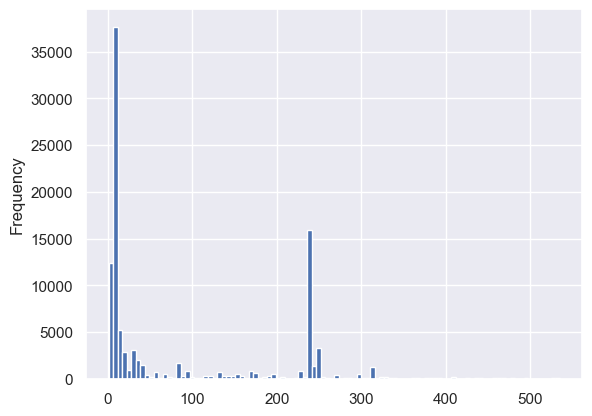

In [30]:
df['agent'].plot(kind='hist', x=df['agent'].value_counts(), bins=100)


In [31]:
# xử lý Company
data= data.drop(['company'], axis=1)

In [32]:
# xử lý chidren
data = data.fillna(data['children'].mode())

In [33]:
# xử lý Country
data = data.fillna(df['country'].mode())

##### Handing Feature 

In [34]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [35]:
# One-Hot Features
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':'1'})
# 
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [36]:
#nếu đi là gia đình có em bé hoặc trẻ nhỏ, return 1
# nếu đi k có em bé hoặc trẻ nhỏ return 0
def family(data):
    if (data['adults']>0 and data['children']>0):
        val = 1
    elif (data['adults']>0 and data['babies']>0):
        val=1
    else:
        val =0
    return val

In [37]:
def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1
        

In [38]:
def feature(data):
    data['family'] = data.apply( family, axis=1)
    data['total_customer'] = (data['adults']+data['children']+data['babies'])
    data['deposit_given'] = data.apply(deposit, axis=1)
    data['total_nights'] = (data['stays_in_weekend_nights']+data['stays_in_week_nights'])
    return data
data = feature(data=data)

In [39]:
data['reservation_status'].value_counts()


Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [40]:
data = data.drop(['adults','children','babies','deposit_type','reservation_status_date'], axis=1)

In [41]:
cor_data = data.copy()

In [42]:
le = LabelEncoder()

In [43]:
# Label Encoder để dự đoán tính năng quan trọng trong tập dữ liệu
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

<AxesSubplot: >

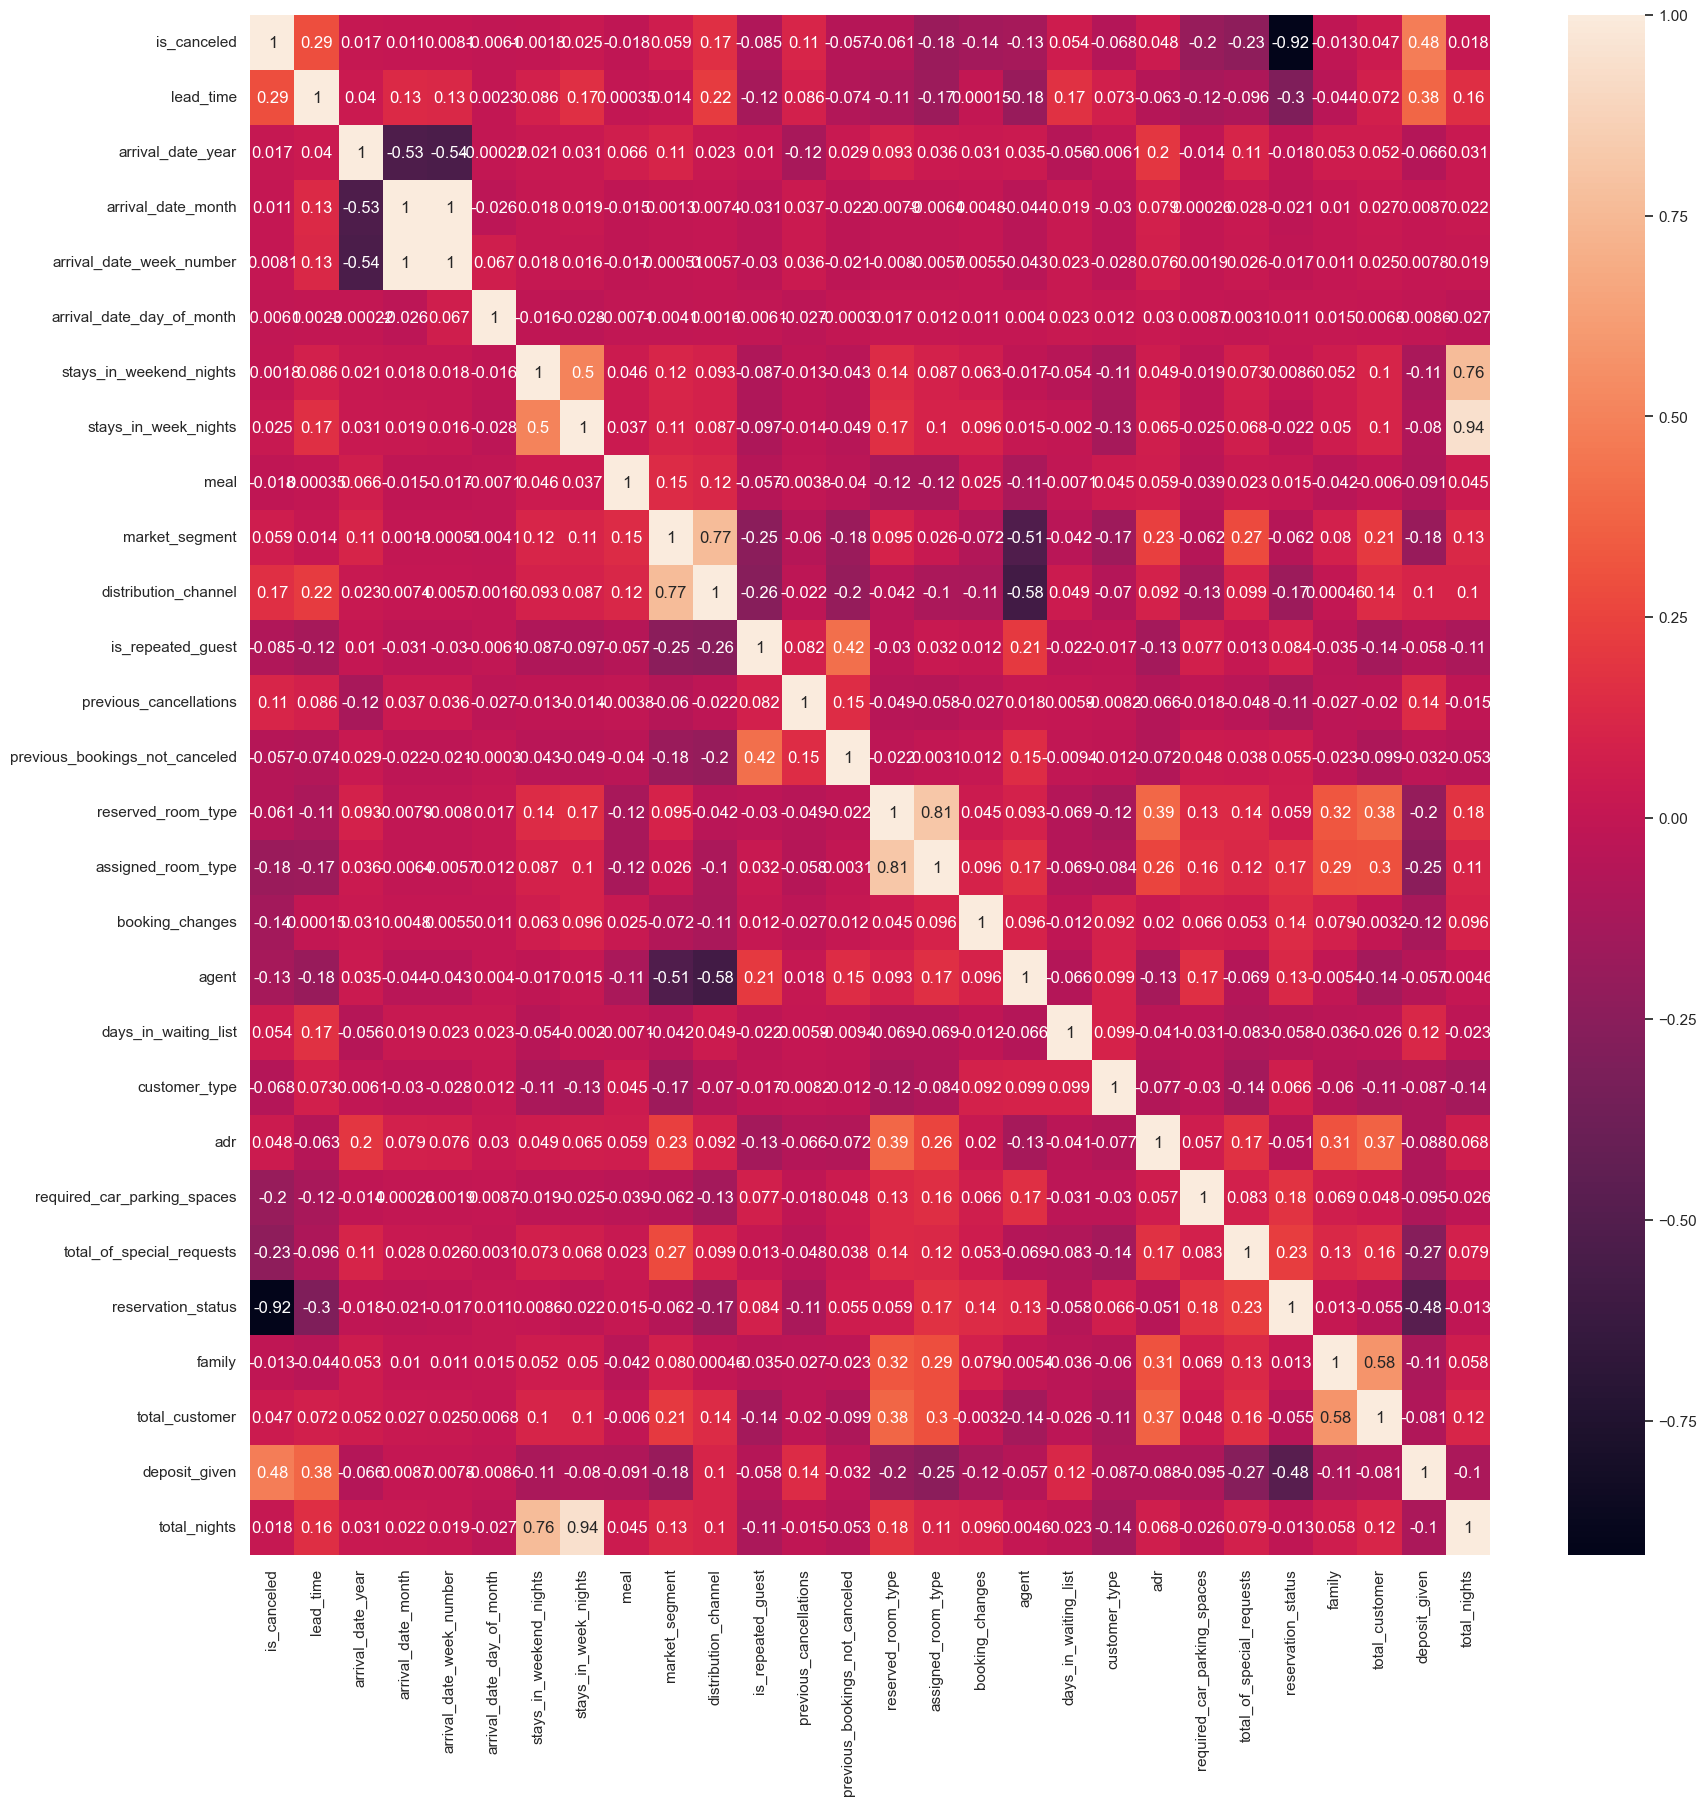

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_data.corr(), annot=True)

In [45]:
cor_data.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_given                     0.481457
lead_time                         0.293123
distribution_channel              0.167600
previous_cancellations            0.110133
market_segment                    0.059338
days_in_waiting_list              0.054186
adr                               0.047557
total_customer                    0.046506
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
family                           -0.013010
meal                             -0.017678
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
customer_type                    -0.068140
is_repeated_guest                -0.084793
agent                            -0.130010
booking_cha

Chúng ta có thể thấy tính năng <b>reservation_status</b> là tính năng tác động lớn nhất đến kết quả dự đoán, cùng với tỉ lệ dự đoán chính xác rất cao

Các tính năng chúng ta tạo ra:
- deposit_given : tác động 0.481457
- total_customer : 0.046506
- total_nights : 0.017779

In [46]:
cor_data.corr()['stays_in_week_nights'].sort_values(ascending=False)

stays_in_week_nights              1.000000
total_nights                      0.941005
stays_in_weekend_nights           0.498969
reserved_room_type                0.168616
lead_time                         0.165799
market_segment                    0.108569
total_customer                    0.101670
assigned_room_type                0.100795
booking_changes                   0.096209
distribution_channel              0.087185
total_of_special_requests         0.068192
adr                               0.065237
family                            0.050424
meal                              0.036742
arrival_date_year                 0.030883
is_canceled                       0.024765
arrival_date_month                0.019212
arrival_date_week_number          0.015558
agent                             0.014903
days_in_waiting_list             -0.002020
previous_cancellations           -0.013992
reservation_status               -0.021607
required_car_parking_spaces      -0.024859
arrival_dat

In [47]:
data.drop(columns=['total_nights','stays_in_weekend_nights','arrival_date_week_number','arrival_date_month'], axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,meal,country,market_segment,distribution_channel,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,family,total_customer,deposit_given
0,0,0,342,2015,1,0,BB,PRT,Direct,Direct,...,NaN,0,Transient,0.00,0,0,Check-Out,0,2.0,0
1,0,0,737,2015,1,0,BB,PRT,Direct,Direct,...,NaN,0,Transient,0.00,0,0,Check-Out,0,2.0,0
2,0,0,7,2015,1,1,BB,GBR,Direct,Direct,...,NaN,0,Transient,75.00,0,0,Check-Out,0,1.0,0
3,0,0,13,2015,1,1,BB,GBR,Corporate,Corporate,...,304.0,0,Transient,75.00,0,0,Check-Out,0,1.0,0
4,0,0,14,2015,1,2,BB,GBR,Online TA,TA/TO,...,240.0,0,Transient,98.00,0,1,Check-Out,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,30,5,BB,BEL,Offline TA/TO,TA/TO,...,394.0,0,Transient,96.14,0,0,Check-Out,0,2.0,0
119386,1,0,102,2017,31,5,BB,FRA,Online TA,TA/TO,...,9.0,0,Transient,225.43,0,2,Check-Out,0,3.0,0
119387,1,0,34,2017,31,5,BB,DEU,Online TA,TA/TO,...,9.0,0,Transient,157.71,0,4,Check-Out,0,2.0,0
119388,1,0,109,2017,31,5,BB,GBR,Online TA,TA/TO,...,89.0,0,Transient,104.40,0,0,Check-Out,0,2.0,0


In [48]:
cor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   meal                            119390 non-null  int32  
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  int32  
 12  distribution_cha

In [49]:
cor_data['total_customer'].fillna(cor_data['total_customer'].mean(), inplace=True)
cor_data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
family      

In [50]:
#Handing missing value country by Drop na
indices = cor_data.loc[pd.isna(cor_data['country']),:].index
data = cor_data.drop(cor_data.index[indices])
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
family                            0
total_customer              

In [51]:
cor_data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
family      

In [52]:
df1 = data.copy()

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  int64  
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   meal                            118902 non-null  int32  
 10  country                         118902 non-null  object 
 11  market_segment                  118902 non-null  int32  
 12  distribution_cha

In [54]:
#one-hot-encoding
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [55]:
df1.shape

(118902, 70)

In [56]:
df1['country']=le.fit_transform(df1['country'])

In [57]:
df1.shape

(118902, 70)

## Modeling

#### Decision Tree Classifier

In [58]:
y=df1['is_canceled']
X = df1.drop(['is_canceled'], axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [60]:
dtc = DecisionTreeClassifier(max_depth=12)

In [61]:
dtc_model = dtc.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

In [62]:
print('Decision Tree Model:')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Rocuver Score: ',roc_auc_score(y_test,y_pred) )

Decision Tree Model:
Accuracy:  1.0
Confusion Matrix: 
 [[22353     0]
 [    0 13318]]
Rocuver Score:  1.0


In [111]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

Text(0.5, 0, 'Feature Importances (%)')

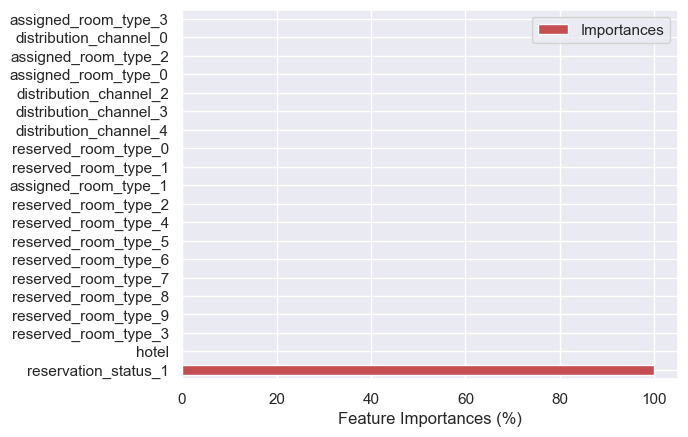

In [63]:
pd.DataFrame(data = dtc_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

In [64]:
df2 = df1.drop(columns = ['reservation_status_1', 'reservation_status_0','reservation_status_2'], axis = 1)


In [65]:
y = df2['is_canceled']
X = df2.drop(['is_canceled'], axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [67]:
dtc1=DecisionTreeClassifier(max_depth=12)
dtc1_model=dtc1.fit(X_train,y_train)
y_pred = dtc1_model.predict(X_test)
print('Decision Tree Classifier: (train Again)')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))


Decision Tree Classifier: (train Again)
Accuracy score:  0.8492893386784783
Confusion matrix : 
 [[20079  2274]
 [ 3102 10216]]
ROC score:  0.8326754166163723
F1 Score:  0.791692498450093


In [108]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print(len(y_pred))
print(len(y_test))
print(len(false_positive_rate))

35671
35671
3


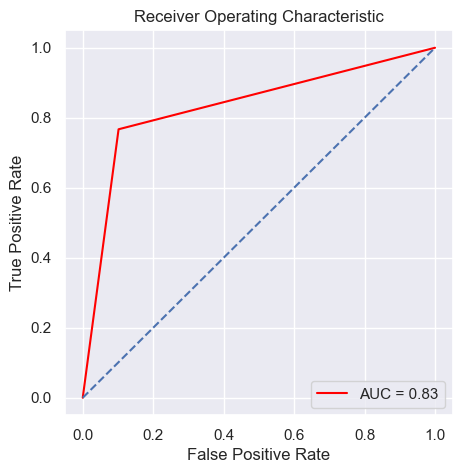

In [68]:
def ROC(y_test, y_pred):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

ROC(y_test, y_pred)

#### Logistic Model

In [69]:
lg_model = LogisticRegression(solver = "liblinear")

In [70]:
lg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [71]:
y_pred_1=lg_model.predict(X_test)

In [72]:
print('Logistic Model: ')
print('Accuracy score: ', accuracy_score(y_test,y_pred_1))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred_1))
print('ROC score: ', roc_auc_score(y_test, y_pred_1))
print('F1 Score: ', f1_score(y_test, y_pred_1))

Logistic Model: 
Accuracy score:  0.8045471110986515
Confusion matrix : 
 [[20486  1867]
 [ 5105  8213]]
ROC score:  0.7665803612014507
F1 Score:  0.7020258141721515


In [73]:
def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (6, 6))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


Mean Score of CV:  0.7400802605210848


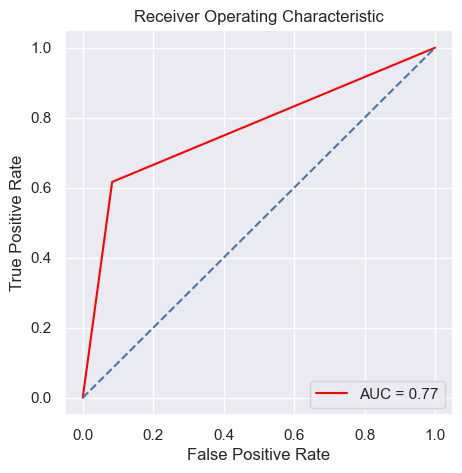

In [74]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())
ROC(y_test, y_pred_1)

[0.         0.10173131 1.        ]


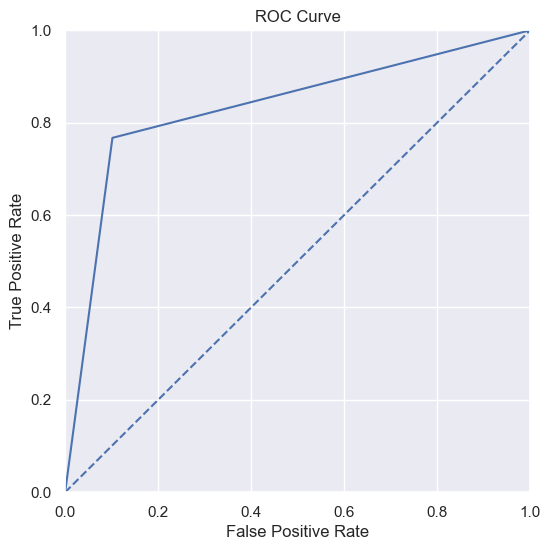

In [79]:
fpr, tpr, thres = roc_curve(y_test, y_pred)
print(fpr)
_plot_roc_curve(fpr, tpr, thres)

#### SVM - Super Vecto Machine

In [76]:
X_train_svm=X_train
X_test_svm=X_test
std = StandardScaler()
std.fit_transform(X_train_svm)
std.fit(X_test_svm)

StandardScaler()

In [ ]:
svm1= SVC(kernel='linear')
alg = svm1.fit(X_train_svm, y_train)

In [ ]:
y_pred = alg.predict(X_test_svm)

In [97]:
print(len(y_pred))

35671


In [ ]:
print('Super Vecto Machine Model: ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Super Vecto Machine Model: 
Accuracy score:  0.7945670152224497
Confusion matrix : 
 [[20882  1471]
 [ 5857  7461]]
ROC score:  0.7472057652906667
F1 Score:  0.6706516853932584


In [89]:
r_pod = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_pod)
print(r_auc)

0.5


In [98]:
r_fpr, r_tpr , _ = roc_curve(y_test, r_pod)
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred)
print(len(svm_fpr))

3


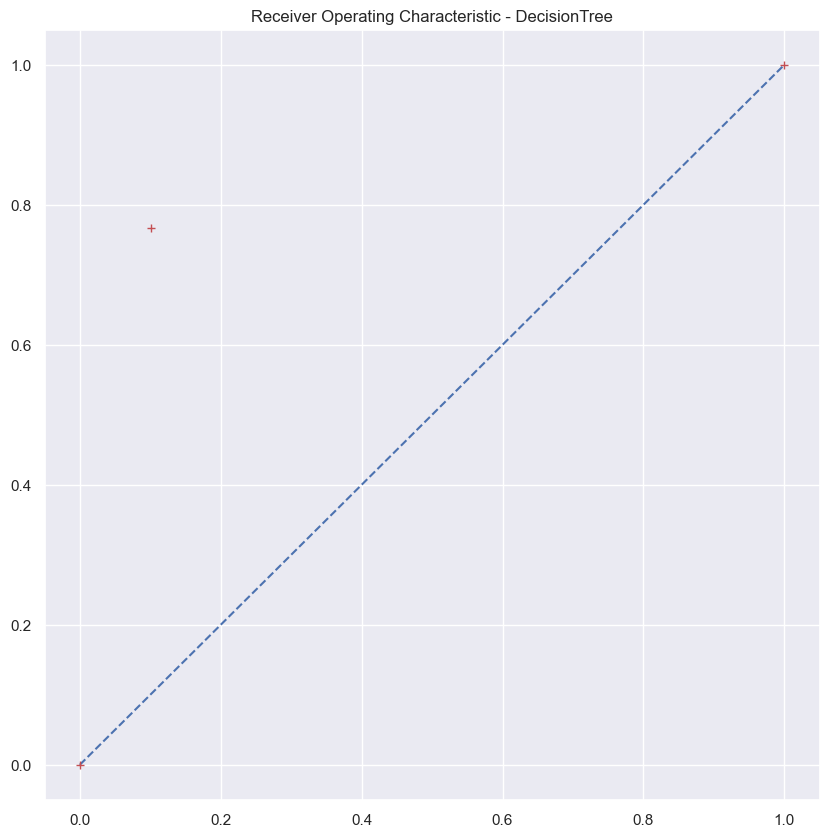

In [99]:
fpr, tpr, thres = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(r_fpr, r_tpr,'--', label='Random predict')
plt.plot(svm_fpr,svm_tpr,'r+')

In [83]:
r_pod = [0 for _ in range(len(y_test))]
r_pod = roc_auc_score(y_test, r_pod)
print(r_pod)

0.5


#### Random Forest

In [ ]:
RDF = RandomForestClassifier()
RDF_model = RDF.fit(X_train, y_train)
y_pred = RDF_model.predict(X_test)


In [ ]:
print('Random Forest Classifier Model: ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Random Forest Classifier Model: 
Accuracy score:  0.8914244063805332
Confusion matrix : 
 [[21032  1321]
 [ 2552 10766]]
ROC score:  0.8746412118399991
F1 Score:  0.8475496949419405


##### Tunning Random Forest Classifier

In [ ]:
param_ = {'n_estimators':[200,300,500],
            'max_depth':[10,15],
            'min_samples_split':[2,5],
            'verbose':[2]}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_, n_jobs=-1, verbose=True)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.9s finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300], 'verbose': [2]},
             verbose=True)

In [ ]:
print('Best parameters: ' + str(grid_search.best_params_))

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100, 'verbose': 2}


In [ ]:
rf_model_tuning = RandomForestClassifier(min_samples_split= 2, 
                                            n_estimators= 500, 
                                            max_depth=15,
                                            verbose= 2)

In [ ]:
model_tuning = rf_model_tuning.fit(X_train, y_train)
y_pred = model_tuning.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [ ]:
print('Random Forest Classifier Model:(Tuning) ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Random Forest Classifier Model:(Tuning) 
Accuracy score:  0.868576714978554
Confusion matrix : 
 [[21238  1115]
 [ 3573  9745]]
ROC score:  0.840917513132318
F1 Score:  0.8061047233021755


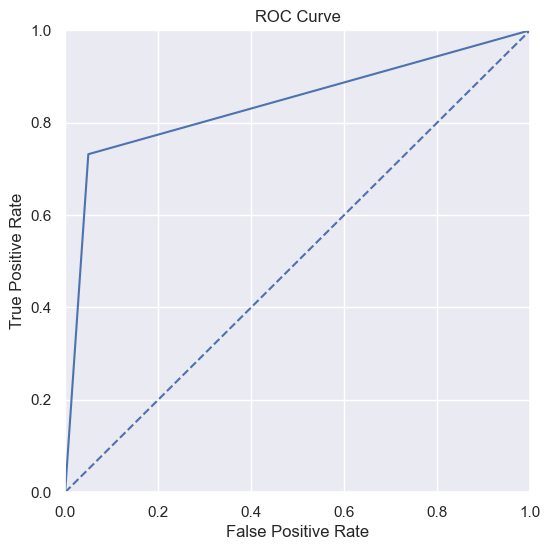

In [ ]:
fpr, tpr, thres = roc_curve(y_test, y_pred)
_plot_roc_curve(fpr, tpr, thres)

#### XGBoots

In [ ]:
X_train['hotel']=X_train['hotel'].astype('uint8')
X_test['hotel']=X_test['hotel'].astype('uint8')

In [ ]:
model = XGBClassifier()
XGB_model = model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print('XGBoots Model: ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))


XGBoots Model: 
Accuracy score:  0.8817807182304953
Confusion matrix : 
 [[20656  1697]
 [ 2520 10798]]
ROC score:  0.8674320892459425
F1 Score:  0.8366327044512454


In [ ]:
help(XGB_model)

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learni

##### XGBoot Tuning

In [ ]:
param_ = {'n_estimators':[100,200,300],
            'max_depth':[10,15],
            'learning_rate':[0.0001,0.001,0.1,1],
            }
model =XGBClassifier()
grid_search_1 = GridSearchCV(model, param_, cv=10, n_jobs=-1, verbose=2)
grid_search_1.fit(X_train, y_train)
print('Best parameters: ' , str(grid_search_1.best_params_))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
grid_search_1.fit(X_train, y_train)
print('Best parameters: ' , str(grid_search_1.best_params_))

In [ ]:
model =XGBClassifier(n_estimators=300,max_depth=15,learning_rate=0.01)
XGB_model=model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)


In [ ]:
print('XGBoots Model:(Tuning) ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

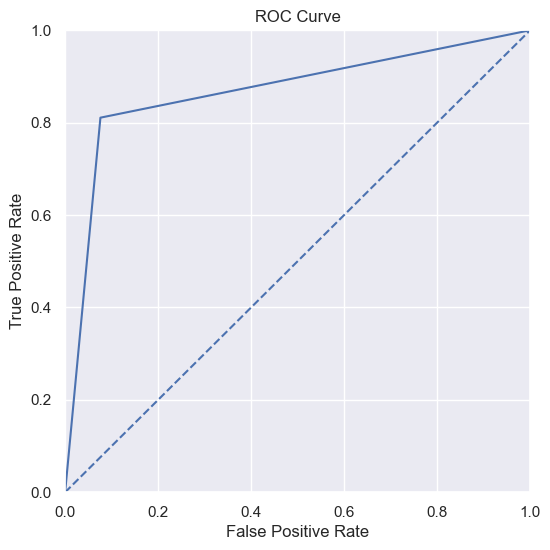

In [ ]:
fpt, tpr, thres = roc_curve(y_test, y_pred)
_plot_roc_curve(fpt, tpr, thres)

#### Neural Network

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
print('Model: Neural Network\n')
model_nn= MLPClassifier()
model_MLP=model_nn.fit(X_train_scaled, y_train)
y_pred=model_MLP.predict(X_test_scaled)

In [ ]:
print('Neural Network Model: ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

##### Neural Network Tuning

In [ ]:
mlpc_parameters = {"alpha": [1, 0.1, 0.01, 0.001],
                   "hidden_layer_sizes": [(50,50,50),
                                          (100,100)],
                   "solver": ["adam", "sgd"],
                   "activation": ["logistic", "relu"]}

In [ ]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_parameters,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

In [ ]:
print('Best parameters: ',mlpc_cv_model.best_params_)

In [ ]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')

In [ ]:
print('Model: Neural Network Tuned\n')
model_MLPC=mlpc_cv_model.fit(X_train_scaled, y_train)
y_pred=model_MLPC.predict(X_test_scaled)

In [ ]:
print('Neural Network Model:(Tuning) ')
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred))
print('ROC score: ', roc_auc_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

### Conclusion

##### Feature Importances

In [ ]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

##### Summary Table of the Models